# Setting up our analysis:
The S&P is often used as a proxy for the economy's health as a whole. It shouldn't really be taken in a vacuum because there is a lot that it doesn't represent, but very broadly speaking, if the S&P is increasing in value, the economy is growing. If it is declining, the economy is shrinking. 

A Chinese equivalent, the SSE 180, measures the 180 largest companies on the Shanghai Stock Exchange ('SSE'), so by comparing some basic statistics between the two, it should indicate whether or not the economies are 'tied' to one another. 

# Hypothesis:
My guess initially is that they are highly tied. China produces a lot of basic inputs for the U.S.'s production of goods, like raw steel, plastics, chemicals, and a variety of others. It would probably not be a stretch to say that the two economies have a symbiotic relationship of sorts, but let's find out how much exactly. Interestingly, recent tariffs have been implemented from both countries that will cause some noise in our data if the markets have in fact incorporated that into their respective prices. 

# Methodology: 
I'm using pandas to manipulate the dataframes, the iexfinance API to pull S&P500 prices, datetime, quandl to pull SSE180 prices, numpy, and matplotlib to plot the data. 

In [2]:
import pandas as pd
from iexfinance import get_historical_data
import datetime as dt
import quandl
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

# display all the data rather than truncating some of it
pd.set_option('display.max_columns', None)

In [3]:
quandl.ApiConfig.api_key = '4saBtvx1DKSxgtzr_suC'

In [4]:
start = dt.datetime(2015, 1, 5)
end = dt.datetime(2017, 12, 29)

In [5]:
# SPY = S&P 500
# IPA is a dataset of chinese stock prices, and ticker 00010 = SSE 180 Index (daily price)
# which is an index for the Shanghai Stock Exchange of the top 180 companies by size
SPY = get_historical_data('SPY', start=start, end=end, output_format='pandas')
China = quandl.get_table('DY/IPA', ticker='000010')


# for simplicities sake, I'm just pulling the 'close' price, which is the price of the index when trading stopped 
China_close = China['close']
SPY_close = SPY['close']

China.sort_values('date', inplace=True)

# Initial Pull and Visualization 
So we can 'eyeball' test this later for whether or not our comparison makes sense, I'm graphing the indices individually first so they can be combined into the same plot later. 

The China data took a bit more cleaning than the S&P, due to different index formats.

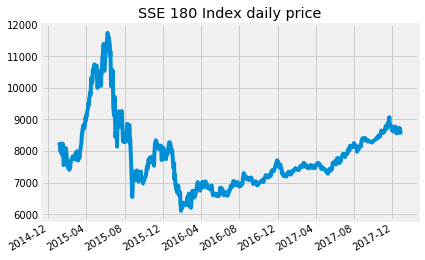

In [6]:
# matplotlib prefers datetime over int64, so this code converts the dates into objects that can be graphed 
China_date = China.date.astype('O')
fig, ax = plt.subplots()
ax.plot(China_date, China.close)
ax.set_title('SSE 180 Index daily price')

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

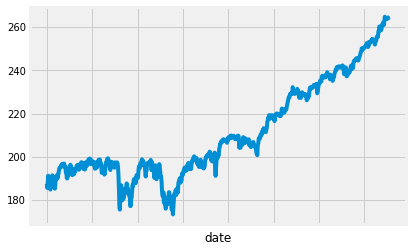

In [6]:
# unsure why this is not plotting date values; close price is in $10s of dollars
SPY['close'].plot()
plt.show()

# Percentage Change Comparison
Since the overall values are dramatically different (The S&P data appears to be in 10's of dollars), it doesn't make sense to overlay the graphs. Instead, using percentage changes, we can get an idea for volatility between trading days. Looking at the chart, we can make the following observations: 

    1. The Chinese market appears more volatile. I'm not using a technical metric, just observing that there are larger swings in price compared to the S&P. 
    
    2. From 2015 - 2016, there was relatively more volatility in the SSE; we could look into that and see if there was a clear cause for this, like a foreign policy, or other material information. 

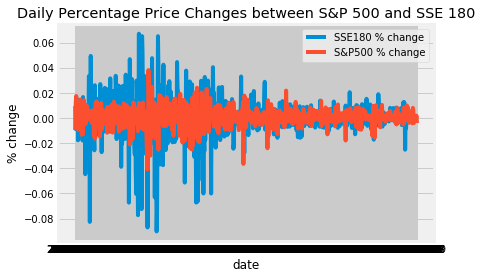

In [21]:
plt.plot(China_close.pct_change(periods=1), label='SSE180 % change')
plt.plot(SPY_close.pct_change(periods=1), label='S&P500 % change')

plt.title('Daily Percentage Price Changes between S&P 500 and SSE 180')

plt.xlabel('date')
plt.ylabel('% change')

plt.legend()

plt.show()